# Descrição

Nessa tarefa você vai programar regressão linear simples do zero em python. Para isso, você vai assistir o seguinte vídeo no [youtube](https://www.youtube.com/watch?v=XdM6ER7zTLk) e seguir o passo a passo da implementação. Embora o código esteja disponível no [github](https://github.com/llSourcell/linear_regression_live) do autor. 

É importante que você digite o código enquanto assiste. Vários estudos já mostraram que aprendemos melhor dessa forma do que somente assistindo. Teste o programa nos dados também fornecidos no github do autor.

Feito isso,  a sua tarefa agora é a seguinte:

1. Rode o mesmo programa nos dados contendo anos de escolaridade (primeira coluna) versus salário (segunda coluna). Baixe os dados no link: [income.csv](https://canvas.instructure.com/courses/1389733/files/68104717/download?verifier=u1l8XB5LcZ51C1MtFrBKJJ9sSPz3f3AOo56Nfk2J&wrap=1). Esse exemplo foi trabalhado em sala de aula. 
2. Modifique o código original para imprimir o RSS a cada iteração do gradiente descendente.
3. O que acontece com o RSS ao longo das iterações (aumenta ou diminui) se você usar 1000 iterações? Plote o RSS vs número de iterações.
4. Teste valores diferentes do número de iterações e learning_rate até que w0 e w1 sejam aproximadamente iguais a -39 e 5 respectivamente. Reporte os valores do número de iterações e learning_rate usados para atingir esses valores.
5. O algoritmo do vídeo usa o número de iterações como critério de parada. Mude o algoritmo para considerar um critério de parada que é relacionado ao tamanho do gradiente (como no algoritmo apresentado em sala). Plote o tamanho do gradiente vs número de iterações.
6. Ache um valor de tolerância que se aproxime dos valores dos parâmetros do item 4 acima. Que valor foi esse?
7. Implemente a forma fechada (equações normais) de calcular os coeficientes de regressão (vide algoritmo nos slides). Compare o tempo de processamento com o gradiente descendente considerando sua solução do item 6.

## Import Libraries

In [1]:
from numpy import *
import pandas as pd

import matplotlib.pyplot as plt

## EDA

In [2]:
df = pd.read_csv('../data/income.csv')
df.head()

,10,26.6588387834389
0,10.401338,27.306435
1,10.842809,22.132410
2,11.244147,21.169841
3,11.645485,15.192634
4,12.086957,26.398951


## Item 1
Rode o mesmo programa nos dados contendo anos de escolaridade (primeira coluna) versus salário (segunda coluna)

In [3]:

# y = mx + b
# m is slope, b is y-intercept
def compute_error_for_line_given_points(b, m, points):
    totalError = 0
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        totalError += (y - (m * x + b)) ** 2
    return totalError / float(len(points))

def step_gradient(b_current, m_current, points, learningRate):
    b_gradient = 0
    m_gradient = 0
    N = float(len(points))
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        b_gradient += -(2/N) * (y - ((m_current * x) + b_current))
        m_gradient += -(2/N) * x * (y - ((m_current * x) + b_current))
    new_b = b_current - (learningRate * b_gradient)
    new_m = m_current - (learningRate * m_gradient)
    return [new_b, new_m]

def gradient_descent_runner(points, starting_b, starting_m, learning_rate, num_iterations):
    b = starting_b
    m = starting_m
    for i in range(num_iterations):
        b, m = step_gradient(b, m, array(points), learning_rate)
    return [b, m]

def run():
    points = genfromtxt("../data/income.csv", delimiter=",")
    learning_rate = 0.0001
    initial_b = 0 # initial y-intercept guess
    initial_m = 0 # initial slope guess
    num_iterations = 1000
    print("Starting gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b, initial_m, compute_error_for_line_given_points(initial_b, initial_m, points)))
    print("Running...")
    [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
    print("After {0} iterations b = {1}, m = {2}, error = {3}".format(num_iterations, b, m, compute_error_for_line_given_points(b, m, points)))

if __name__ == '__main__':
    run()

Starting gradient descent at b = 0, m = 0, error = 2946.6344970460195
Running...
After 1000 iterations b = -0.18234255376510086, m = 3.262182267596014, error = 103.39842291729676


## Item 2
Modifique o código original para imprimir o RSS a cada iteração do gradiente descendente.

In [4]:
logs = pd.DataFrame(columns=['m', 'b', 'error', 'itera'])

In [9]:

# y = mx + b
# m is slope, b is y-intercept
def compute_error_for_line_given_points(b, m, points):
    totalError = 0
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        totalError += (y - (m * x + b)) ** 2
    return totalError / float(len(points))

def step_gradient(b_current, m_current, points, learningRate, itera, verbose=False, period=50, logs=logs):
    b_gradient = 0
    m_gradient = 0
    N = float(len(points))
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        b_gradient += -(2/N) * (y - ((m_current * x) + b_current))
        m_gradient += -(2/N) * x * (y - ((m_current * x) + b_current))
    new_b = b_current - (learningRate * b_gradient)
    new_m = m_current - (learningRate * m_gradient)
    
    new_error = compute_error_for_line_given_points(new_b, new_m, points)
    
    if verbose:
        if itera % period == 0:
            print("Step gradient at b = {0}, m = {1}, error = {2}".format(new_b, new_m, new_error))
    
    logs.append([[new_b, new_m, new_error, itera]])
    
    return [new_b, new_m]

def gradient_descent_runner(points, starting_b, starting_m, learning_rate, num_iterations):
    b = starting_b
    m = starting_m
    for i in range(num_iterations):
        b, m = step_gradient(b, m, array(points), learning_rate, i, verbose=True)
    return [b, m]

def run():
    points = genfromtxt("../data/income.csv", delimiter=",")
    learning_rate = 0.0001
    initial_b = 0 # initial y-intercept guess
    initial_m = 0 # initial slope guess
    num_iterations = 1000
    
    initial_error = compute_error_for_line_given_points(initial_b, initial_m, points)
    print("Starting gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b, initial_m, initial_error))
    print("Running...")
    
    [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
    final_error = compute_error_for_line_given_points(b, m, points)
    
    print("After {0} iterations b = {1}, m = {2}, error = {3}".format(num_iterations, b, m, final_error))


In [10]:
run()

Starting gradient descent at b = 0, m = 0, error = 2946.6344970460195
Running...
Step gradient at b = 0.010029093861364507, m = 0.17483245665563385, error = 2648.2381266261386
Step gradient at b = 0.16224451219582517, m = 3.0495672429883767, error = 114.65917190116292
Step gradient at b = 0.1540919959601231, m = 3.230157419836556, error = 104.70597869157886


/home/guilherme/anaconda3/envs/ml-mestrado/lib/python3.6/site-packages/pandas/core/indexes/api.py:107: RuntimeWarning: '<' not supported between instances of 'str' and 'int', sort order is undefined for incomparable objects
  result = result.union(other)


Step gradient at b = 0.13593224011303429, m = 3.2424867207851698, error = 104.59629197125872
Step gradient at b = 0.11715588250239854, m = 3.244306940687362, error = 104.52506735534097
Step gradient at b = 0.0983494029715421, m = 3.245470326109695, error = 104.45406006127061
Step gradient at b = 0.0795494256035937, m = 3.246592190479218, error = 104.38312085074011
Step gradient at b = 0.06075823373709083, m = 3.2477109628793253, error = 104.31224907772851
Step gradient at b = 0.041975965992178225, m = 3.248829043600966, error = 104.24144467586197
Step gradient at b = 0.023202627044437908, m = 3.249946582789181, error = 104.17070758108825
Step gradient at b = 0.0044382132059579285, m = 3.2510635900580587, error = 104.10003772942464
Step gradient at b = -0.014317279731615907, m = 3.2521800662448426, error = 104.0294350569496
Step gradient at b = -0.0330638560072504, m = 3.2532960116385135, error = 103.95889949980202
Step gradient at b = -0.05180151985993397, m = 3.254411426493699, error 

### Plot Error By Step Gradient Iteration

In [7]:
logs.head()

,m,b,error,itera


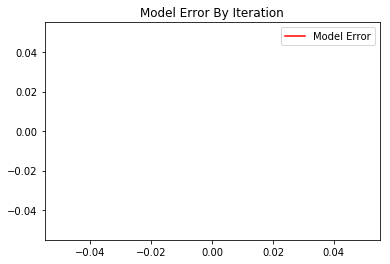

<Figure size 432x288 with 0 Axes>

In [8]:

plt.plot(logs['itera'], logs['error'] , 'r', label='Model Error') 
plt.title('Model Error By Iteration') 
plt.legend()

plt.figure()

plt.show()